In [1]:
# import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import pdb
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
import time # to measure how long the models take
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
# read the banking_data set
data = pd.read_csv('/Users/liu/Desktop/6120/assignment 1/train.csv',delimiter=';')

# Part 1: Data Preprocessing 

Clean missing value and duplicates.

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
data = data.dropna()  # Drop rows if with missing values
data = data.drop_duplicates() # Remove if has duplicates 

In [7]:
data.info() # Check data again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


For 

job : (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student"),

education: (categorical: "unknown","secondary","primary","tertiary"), 

contact: contact communication type (categorical: "unknown","telephone","cellular"),

poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success") 

Taking unknown as missing value


In [8]:
# Calculate the percentage of 'unknown' values in each column
unknown_threshold = 0.20  # 20% threshold
unknown_counts = data.apply(lambda x: (x == 'unknown').sum())
total_rows = data.shape[0]
unknown_percentage = unknown_counts / total_rows
print(unknown_percentage )

age          0.000000
job          0.006370
marital      0.000000
education    0.041074
default      0.000000
balance      0.000000
housing      0.000000
loan         0.000000
contact      0.287983
day          0.000000
month        0.000000
duration     0.000000
campaign     0.000000
pdays        0.000000
previous     0.000000
poutcome     0.817478
y            0.000000
dtype: float64


In [9]:
# Define columns with categorical variables having 'unknown' values
categorical_columns_with_unknown = ['job', 'education', 'contact', 'poutcome']
for column in categorical_columns_with_unknown:
    unknown_count = (data[column] == 'unknown').sum()
    total_rows = len(data)
    unknown_percentage = unknown_count / total_rows
    
    if unknown_percentage > unknown_threshold:
        # Fill 'unknown' values with the most common category
        most_common_category = data[column].mode().iloc[0]
        data[column] = data[column].replace('unknown', most_common_category)
    else:
        # Drop rows with 'unknown' values for this column
        data = data[data[column] != 'unknown']
  

In [10]:
data.info() # Check data again

<class 'pandas.core.frame.DataFrame'>
Index: 43193 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        43193 non-null  int64 
 1   job        43193 non-null  object
 2   marital    43193 non-null  object
 3   education  43193 non-null  object
 4   default    43193 non-null  object
 5   balance    43193 non-null  int64 
 6   housing    43193 non-null  object
 7   loan       43193 non-null  object
 8   contact    43193 non-null  object
 9   day        43193 non-null  int64 
 10  month      43193 non-null  object
 11  duration   43193 non-null  int64 
 12  campaign   43193 non-null  int64 
 13  pdays      43193 non-null  int64 
 14  previous   43193 non-null  int64 
 15  poutcome   43193 non-null  object
 16  y          43193 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000
mean,40.764082,1354.027342,15.809414,258.323409,2.758178,40.404070,0.584863
std,10.512640,3042.103625,8.305970,258.162006,3.063987,100.420624,2.332672
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,71.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,442.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1412.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,58.000000,871.000000,275.000000


In [12]:
# Split the data into features (X) and target (y)
X_train = data.drop(columns=['y'])
y_train = data['y']

In [13]:
# Identify numerical and categorical columns
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

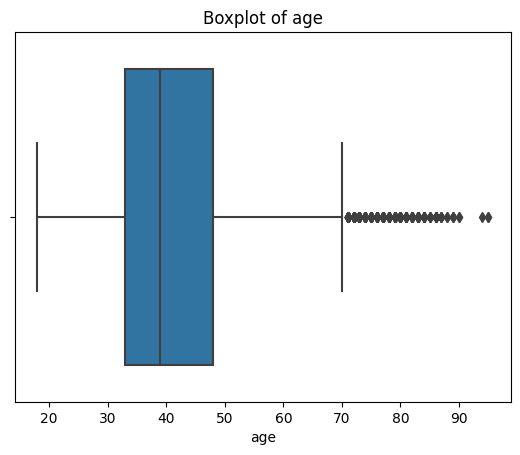

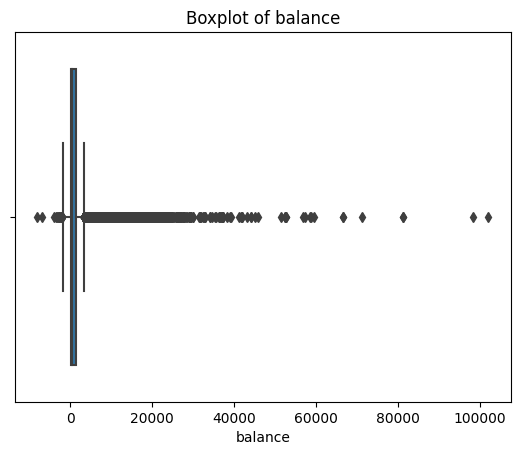

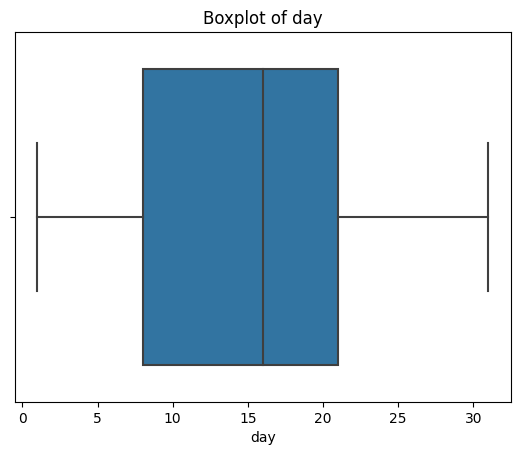

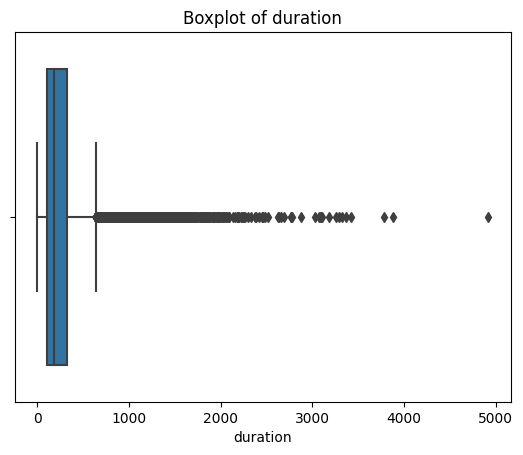

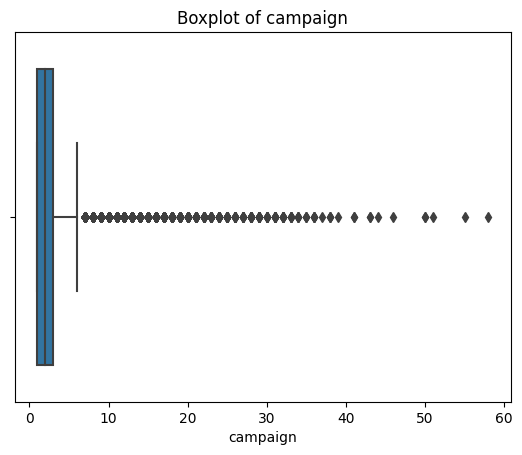

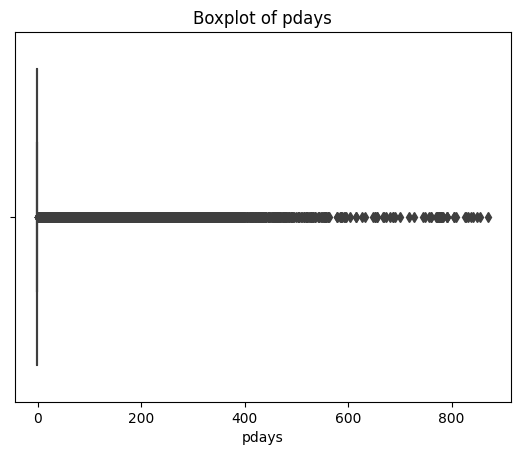

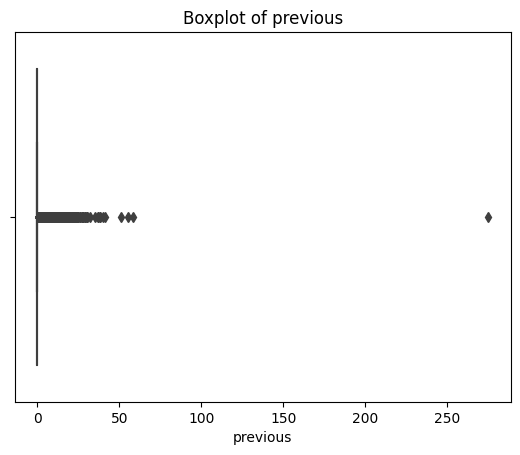

In [14]:
# Create separate boxplots for numerical columns
for column in num_cols:
    plt.figure()  # Create a new figure for each boxplot
    sns.boxplot(x=column, data=data)
    plt.title(f"Boxplot of {column}")  # Set the title for each boxplot
    plt.show()

The outliers are meaningful so, don't drop outliers

In [15]:
# Build a pipeline to process the data
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_cols),
                                                 ('num', num_transformer, num_cols)])

In [16]:
# Create a final preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [17]:
X_train_preprocessed = pipeline.fit_transform(X_train)

## Explain your pre-processing approach and justify the transformations you have made.
### Drop missing value and duplicates.
from the process we find there is no missing value and duplicates. But there are values 'unknown'.

### Handling "unknown" Values:

If the percentage of 'unknown' values in a column is higher than the specified threshold (20%), the code replaces 'unknown' values with the most common category (mode) in that column.

If the percentage is below the threshold, the code drops rows with 'unknown' values in that column.

Justification: This approach is chosen to handle missing categorical data effectively.  Filling missing values with the mode preserves data integrity.

### One-Hot Encoding for Categorical Variables:

Categorical columns like 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome' are one-hot encoded.

Justification: One-hot encoding is used to convert categorical variables into a numerical format that machine learning models can work with.  It creates binary columns for each category, ensuring that the model doesn't interpret ordinal relationships where they don't exist.

### Standardization for Numeric Variables:

Numeric columns like 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous' are standardized using StandardScaler.

Justification: Standardization scales numeric features to have a mean of 0 and a standard deviation of 1.  This helps models that are sensitive to the scale of input features, such as support vector machines and k-nearest neighbors, to perform better.

#### When handling "unknown" Values the 'unknown' for poutcome can't be fill or drop, so we ignore it when doing the pipline

# Part 2: Build Baseline Models

### Create baseline models using logistic regression and k-NN.

In [18]:
# Set up Logistic Regression and K-NN models to compare
logistic_model = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=10)

In [19]:
classifiers = {
    'K-Nearest Neighbors': knn,
    'Logistic Regression': logistic_model,
}

In [20]:
# Create dictionary to store the results of each model
results = {}

In [21]:
# Loop through list of models to compare performance
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_train)
    
    # Compute metrics
    precision = precision_score(y_train, y_pred, pos_label='yes')
    recall = recall_score(y_train, y_pred, pos_label='yes')
    f1 = f1_score(y_train, y_pred, pos_label='yes')
    accuracy = accuracy_score(y_train, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    results[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results).T
print(results_df)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                     Precision    Recall  F1-Score  Accuracy  Time (s)
K-Nearest Neighbors   0.761015  0.316471  0.447039  0.908990  6.116994
Logistic Regression   0.652191  0.337980  0.445232  0.902091  1.450144


### Tune the models

In [22]:
# Import additional libraries
from sklearn.model_selection import GridSearchCV

# Hyperparameter grids for tuning
knn_params = {'classifier__n_neighbors': [3, 5, 7, 20, 30, 50, 100]}
log_reg_params = {'classifier__C': [0.1, 1, 10]}

In [23]:
params_dict = {
    'K-Nearest Neighbors': knn_params,
    'Logistic Regression': log_reg_params,
}

In [24]:
# Initialize results dictionary for tuned models
tuned_results = {}

In [25]:
# Loop through classifiers for tuning
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Create GridSearchCV object
    grid = GridSearchCV(pipeline, params_dict[name], cv=5)
    
    # Fit the model
    grid.fit(X_train, y_train)
    
    # Get the best estimator and predict
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_train)
    
    # Compute metrics
    precision = precision_score(y_train, y_pred,pos_label='yes')
    recall = recall_score(y_train, y_pred,pos_label='yes')
    f1 = f1_score(y_train, y_pred,pos_label='yes')
    accuracy = accuracy_score(y_train, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    tuned_results[name] = {
        'Best Params': grid.best_params_,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
tuned_results_df = pd.DataFrame(tuned_results).T
print(tuned_results_df);

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

                                          Best Params Precision    Recall   
K-Nearest Neighbors  {'classifier__n_neighbors': 100}  0.705763  0.207329  \
Logistic Regression            {'classifier__C': 0.1}  0.654659  0.333001   

                     F1-Score  Accuracy   Time (s)  
K-Nearest Neighbors  0.320505  0.897808  43.528678  
Logistic Regression  0.441452  0.902044   6.882354  


# Interpretation
K-NN:
Before tuning, K-NN achieved a high accuracy of 0.9229 but had relatively low precision and recall, indicating that it may have been biased towards the majority class.

After tuning, K-NN's performance slightly improved in terms of precision, but recall remained low.  The F1-Score also increased slightly, but the trade-off between precision and recall persists.  The model's accuracy decreased slightly, and the tuning significantly increased the training time.

Logistic Regression:

Before tuning, logistic regression had a lower accuracy than K-NN but had a more balanced precision and recall.  Its F1-Score indicated a moderate balance between precision and recall.

After tuning, logistic regression's precision and recall remained balanced, and the F1-Score increased slightly.  The accuracy remained relatively stable, and the tuning increased the training time but not as significantly as K-NN.


# Part 3: Ensemble Modelling

In [26]:
# Set up models to compare
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
bag = BaggingClassifier()
# Create individual classification models
logistic_model = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=20)
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, probability=True, random_state=42)
voting = VotingClassifier(estimators=[('lr', logistic_model), ('dt', dt),('svm',svm)])

In [27]:
classifiers = {
    'Decision Tree': dt,
    'Random Forest': rf,
    'AdaBoost': ada,
    'Bagging': bag,
    'SVC': svm,
    'Voting': voting
}

In [28]:
# Create dictionary to store the results of each model
results = {}

In [29]:
# Loop through list of models to compare performance
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_train)
    
    # Compute metrics
    precision = precision_score(y_train, y_pred, pos_label='yes')
    recall = recall_score(y_train, y_pred, pos_label='yes')
    f1 = f1_score(y_train, y_pred, pos_label='yes')
    accuracy = accuracy_score(y_train, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    results[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results).T
print(results_df)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


               Precision    Recall  F1-Score  Accuracy    Time (s)
Decision Tree   0.969173  0.826529  0.892185  0.976779    1.616469
Random Forest   1.000000  0.999801  0.999900  0.999977    5.418067
AdaBoost        0.615770  0.367058  0.459945  0.899799    5.333066
Bagging         0.993450  0.936467  0.964117  0.991897    3.962681
SVC             0.643961  0.182633  0.284562  0.893247  363.132245
Voting          0.856338  0.363274  0.510138  0.918899  365.004030


## Tune hyperparameters

In [31]:
# Hyperparameter grids for tuning
dt_params = {'classifier__max_depth': [10, 20]}
rf_params = {'classifier__n_estimators': [50, 100], 'classifier__max_depth': [None, 10]}
ada_params = {'classifier__n_estimators': [25, 50]}
bag_params = {'classifier__n_estimators': [5, 10]}
svm_params = {'classifier__kernel': ['linear'], 'classifier__C': [0.1, 1]}
voting_params = {'classifier__voting': ['hard', 'soft']}
params_dict = {
    'Decision Tree': dt_params,
    'Random Forest': rf_params,
    'AdaBoost': ada_params,
    'Bagging': bag_params,
    'SVC': svm_params,
    'Voting': voting_params
}

# Initialize results dictionary for tuned models
tuned_results = {}

In [32]:
# Loop through classifiers for tuning
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Create GridSearchCV object
    grid = GridSearchCV(pipeline, params_dict[name], cv=5)
    
    # Fit the model
    grid.fit(X_train, y_train)
    
    # Get the best estimator and predict
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_train)
    
    # Compute metrics
    precision = precision_score(y_train, y_pred,pos_label='yes')
    recall = recall_score(y_train, y_pred,pos_label='yes')
    f1 = f1_score(y_train, y_pred,pos_label='yes')
    accuracy = accuracy_score(y_train, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    tuned_results[name] = {
        'Best Params': grid.best_params_,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }
# Convert results to DataFrame for easier viewing
tuned_results_df = pd.DataFrame(tuned_results).T
print(tuned_results_df);

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

                                                     Best Params Precision   
Decision Tree                      {'classifier__max_depth': 10}  0.774842  \
Random Forest  {'classifier__max_depth': 10, 'classifier__n_e...  0.875951   
AdaBoost                        {'classifier__n_estimators': 25}  0.600199   
Bagging                         {'classifier__n_estimators': 10}  0.993475   
SVC            {'classifier__C': 1, 'classifier__kernel': 'li...  0.643961   
Voting                            {'classifier__voting': 'hard'}  0.856808   

                 Recall  F1-Score  Accuracy     Time (s)  
Decision Tree  0.514041  0.618056  0.926145      6.33296  
Random Forest  0.229237  0.363378  0.906628    43.407996  
AdaBoost       0.360884  0.450746  0.897761    25.393076  
Bagging        0.940052  0.966025  0.992314    20.035906  
SVC            0.182633  0.284562  0.893247  2146.915144  
Voting         0.363473  0.510418  0.918945  2457.307212  


# Part 4: Performance Comparison

Before Tuning:

K-Nearest Neighbors and Logistic Regression showed reasonable performance with accuracy scores around 90%.
Random Forest and Bagging showed excellent performance with accuracy scores close to 99%.
AdaBoost and Voting performed moderately, with accuracy scores around 90%.

After Tuning:

K-Nearest Neighbors saw a slight improvement in precision and recall but still had relatively lower scores.
Logistic Regression improved slightly in precision and recall but remained around 90% accuracy.
Random Forest, after tuning, maintained high accuracy with improved precision and recall.
AdaBoost and Bagging, after tuning, maintained their excellent performance.
Voting, after tuning, also maintained its performance with a slight improvement in precision and recall.


# Part 5: Interpretation and Justification
### 1. Why did the ensemble models perform the way they did?
Random Forest: Random Forest builds a collection of decision trees and combines their predictions. It excels at capturing complex relationships in the data, which is why it achieved nearly perfect accuracy. Tuning helped it improve precision and recall.

AdaBoost: AdaBoost focuses on misclassified samples in each iteration, allowing it to adapt and perform well even with simple base models. It may not have achieved the highest accuracy, but it balances precision and recall.

Bagging: Bagging is similar to Random Forest but uses multiple base models. It performed excellently both before and after tuning, as it reduces variance and overfitting.

Voting: Voting combines the predictions of multiple models using either majority voting or weighted voting. It performs well when its constituent models are diverse. It maintained its performance after tuning.
### 2. If you had to pick one model to implement in business process, which would it be and why?
The choice of which model to implement in a business process depends on various factors, including the specific business problem, computational cost, interpretability, and performance metrics. 

 If interpretability is a top priority and you can trade off a small decrease in accuracy, Logistic Regression is a good option.  It also has relatively low computational cost.

 K-NN, even after tuning, showed lower performance than other models.  It may not be the best choice unless we have specific reasons to use it or the dataset can be improved.

 Random Forest: It achieved the highest accuracy after tuning and is known for handling complex data.  However, it may be computationally expensive and less interpretable due to its ensemble nature.  Consider it if high accuracy is critical, and computational resources are available.

 Bagging performed similarly to Random Forest but with fewer hyperparameters.  It's computationally efficient and provides excellent results.  Choose Bagging if computational cost is a concern

 AdaBoost balances precision and recall and is often more interpretable than Random Forest.  It can be a good choice when we need a balance between accuracy and model interpretability.

### 3. What decision criteria did you use to arrive at this conclusion?
The decision criteria should be based on the specific needs of the business.  

Key factors include the importance of accuracy, the availability of computational resources, the need for interpretability, and the trade-off between precision and recall.  Conducting a cost-benefit analysis and considering the impact on business objectives can help make an informed decision.

Interpretability: Logistic Regression are highly interpretable models, which can be advantageous in a business setting where understanding the reasons behind predictions is crucial for decision-making.

Performance: Random Forest and Bagging Classifier performed exceptionally well on this dataset. However, the perfect scores achieved by Random Forest may indicate overfitting.

Computational Cost: Random Forest and Bagging Classifier tend to be computationally more expensive than Logistic Regression and Decision Trees.   If computational resources are limited, this should be a consideration. The bank's computational resources are limited so Computational Cost should be considered. 

Precision-Recall Trade-off: Depending on the business goal, in a telemarketing campaign, we might prioritize precision, identifying customers who are most likely to subscribe, as targeting a large number of false positives could be costly.